# Lichess data visualization

Lichess data visualization

By Isthmus // Mitchell P. Krawiec-Thayer

## Import Libraries
(if you have any issues with the next cell, run `pip install -r requirements.txt` to install dependencies)

In [1]:
import isthmuslib as isli
import pandas as pd
import matplotlib.pyplot as plt
import os as os

## Set parameters

In [2]:
data_file_path = os.path.join(os.path.curdir)
data_file_name = 'puzzle_history.csv'

## Import data

Load from file

In [3]:
df = pd.read_csv(os.path.join(data_file_path, data_file_name))
df.head()

,reverse_order,id,date,win,rating
0,0,hhrYF,1624134299340,True,1777
1,1,DmlXB,1624134247927,False,1955
2,2,mqmKF,1624134227576,False,1932
3,3,3jWLM,1624134018128,True,1886
4,4,u80vy,1624133920735,True,1689


## Data overview

In [4]:
df.describe()

,reverse_order,date,rating
count,764.000000,7.640000e+02,764.000000
mean,381.500000,1.621885e+12,1791.956806
std,220.692093,2.442188e+09,112.827218
min,0.000000,1.612840e+12,1309.000000
25%,190.750000,1.622141e+12,1725.750000
50%,381.500000,1.622416e+12,1793.000000
75%,572.250000,1.623509e+12,1859.000000
max,763.000000,1.624134e+12,2246.000000


## Data visualizations

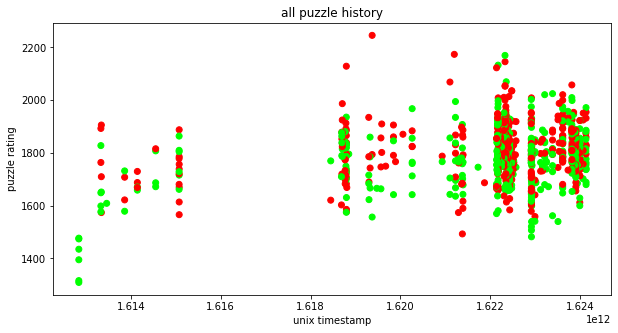

In [24]:
f = plt.figure(figsize=(10, 5), facecolor='w')
plt.scatter(df['date'], df['rating'], c=df['win'], cmap='brg', vmin=-1)
plt.xlabel('unix timestamp')
plt.title('all puzzle history')
plt.ylabel('puzzle rating');

Zoom in to see clusters representing individual training sessions

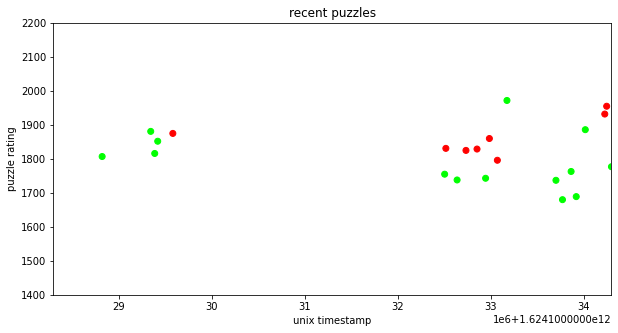

In [26]:
x_max_pin = 1624134299340  # pinnnig this so the window doesn't move when data set updates
f = plt.figure(figsize=(10, 5), facecolor='w')
plt.scatter(df['date'], df['rating'], c=df['win'], cmap='brg', vmin=-1)
plt.xlim((x_max_pin - 6e6, x_max_pin))
plt.xlabel('unix timestamp')
plt.title('recent puzzles')
plt.ylabel('puzzle rating')
plt.ylim((1400, 2200));

## Stats

In [27]:
seconds_per_week = 604800
number_of_days_in_data_set: int = round((max(df['date']) - min(df['date'])) / (seconds_per_week * 7))
print('Number of days in data set = ' + str(round(number_of_days_in_data_set)) + ' (' + str(
    round(number_of_days_in_data_set / 365, 1)) + ' years)')


Number of days in data set = 2668 (7.3 years)


In [39]:
daily_df = pd.DataFrame(df['date'].value_counts(bins=number_of_days_in_data_set, sort=False)).rename(
    columns={"date": "count"}).reset_index()
daily_df.head()

,index,count
0,"(1612828898117.884, 1612844425398.581]",6
1,"(1612844425398.581, 1612848658572.162]",0
2,"(1612848658572.162, 1612852891745.744]",0
3,"(1612852891745.744, 1612857124919.326]",0
4,"(1612857124919.326, 1612861358092.907]",0


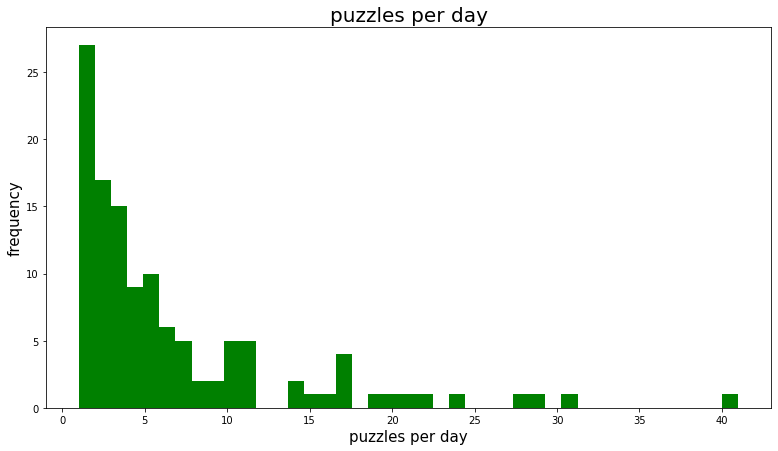

In [40]:
isli.hist(daily_df['count'][daily_df['count'] > 0], bins=max(daily_df['count']), xlabel='puzzles per day',
          ylabel='frequency', title='puzzles per day');

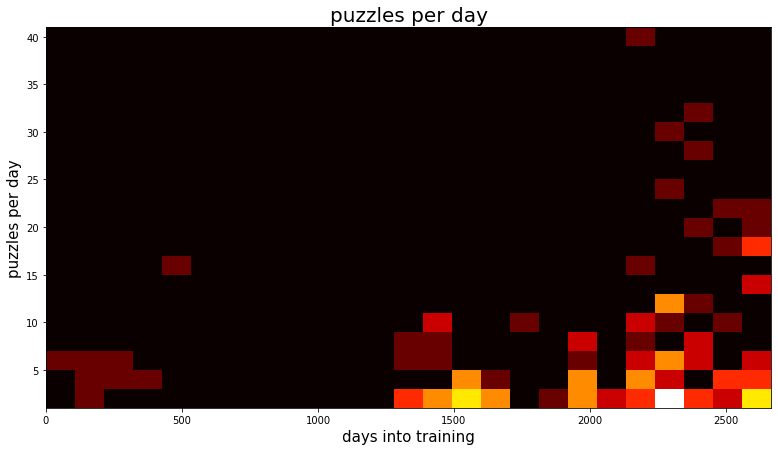

In [63]:
daily_df_gt0 = daily_df[daily_df['count'] > 0]
isli.hist2d(daily_df_gt0.index, daily_df_gt0['count'], bins=(25, 20), xlabel='days into training',
            ylabel='puzzles per day', title='puzzles per day', cmap='hot');

